In [1]:
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [2]:
sc.settings.figdir = '../review-figure-updates-pdfs/'

In [3]:
# Load data
adata = sc.read('../data/ym164-compare-data-for-fl.h5ad')
scores = pd.read_csv('../fl-data-ematb/our-cells-fl-ct-score.txt', sep=" ").transpose()

In [4]:
# Fetal Liver Dataset Cell Types
all_fl_cts = ["Kupffer Cell",          
              "Mono-Mac",   
              "Fibroblast" ,  
              "pro-B cell"     , 
              "Endothelial cell" ,      
              "DC2"     ,               
              "Monocyte.1"  ,     
              "DC1"         ,    
              "Early Erythroid" ,      
              "Mid Erythroid"  ,      
              "MEMP"          ,      
              "Mast cell.1"   ,   
              "pDC precursor"  ,
              "Megakaryocyte"  ,  
              "Late Erythroid" ,     
              "HSC-MPP"     ,   
              "pre-B cell"    ,         
              "Early lymphoid-T lymphocyte" ,             
              "B cell"           ,
              "Pre pro B cell"    ,
              "VCAM1+ EI macrophage"  ,  
              "ILC precursor"      ,
              "Neutrophil-myeloid progenitor",
              "Hepatocyte"    ,
              "DC precursor"     ,     
              "Monocyte precursor"   , 
              "NK"]

In [5]:
scores = scores[all_fl_cts]

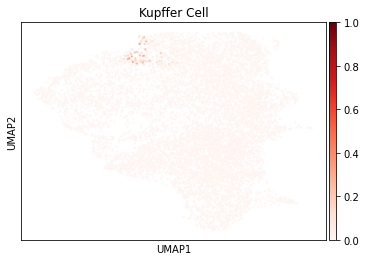

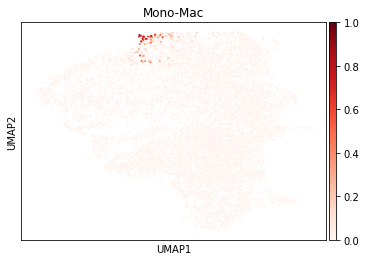

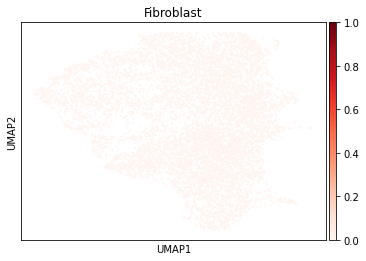

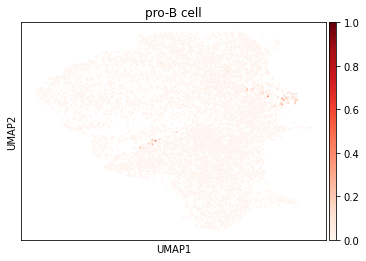

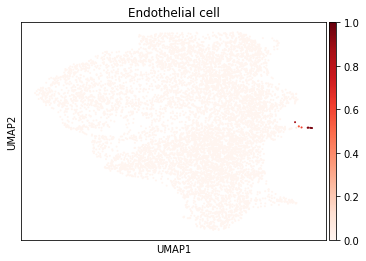

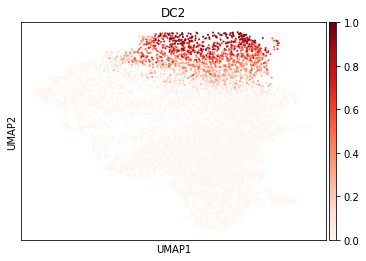

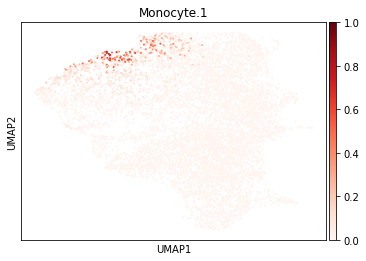

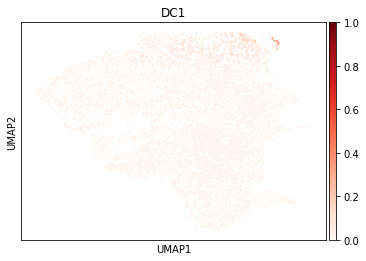

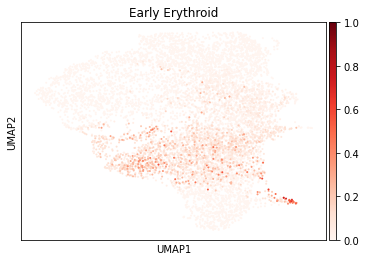

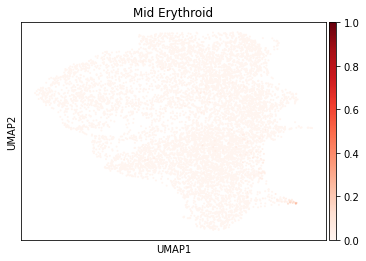

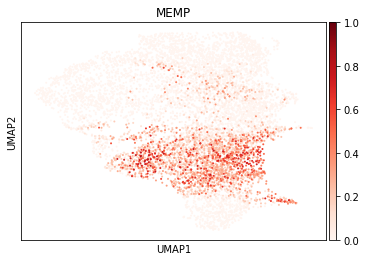

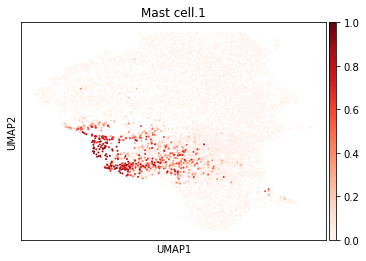

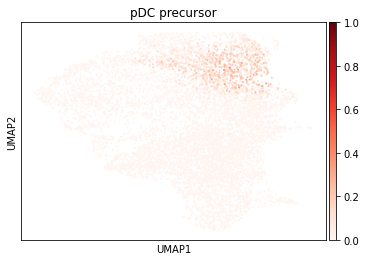

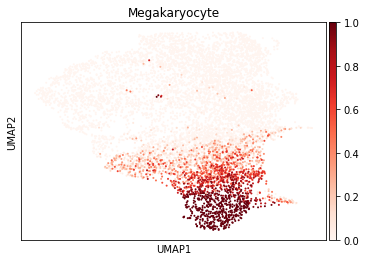

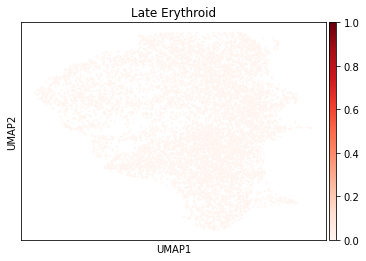

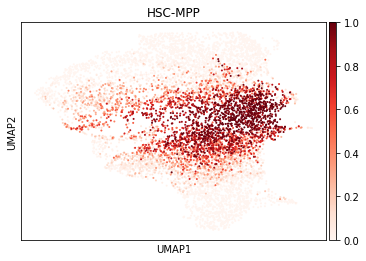

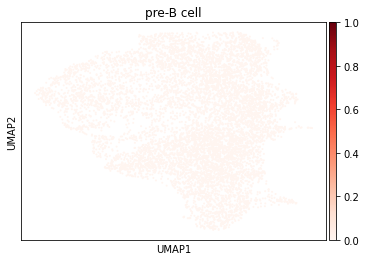

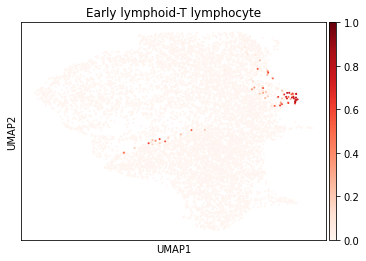

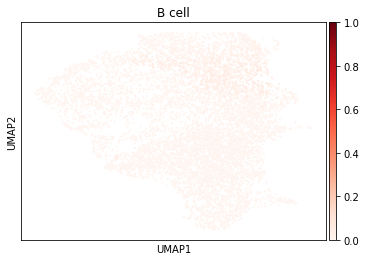

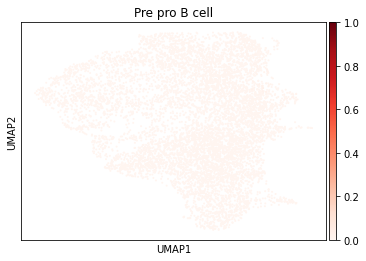

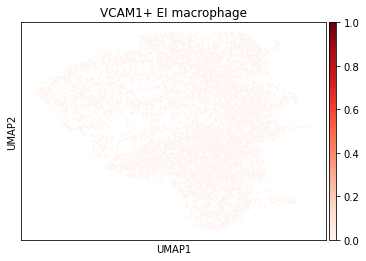

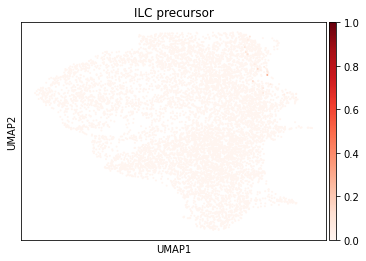

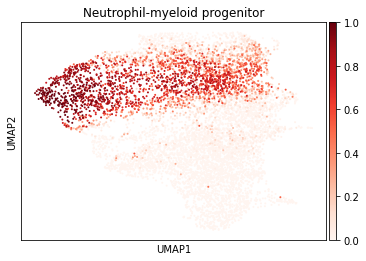

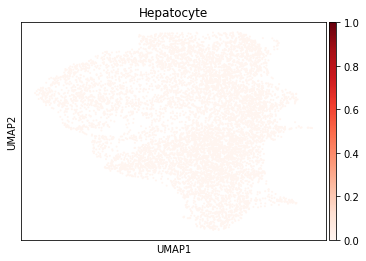

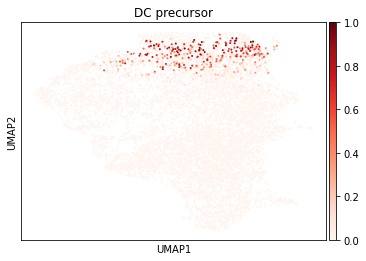

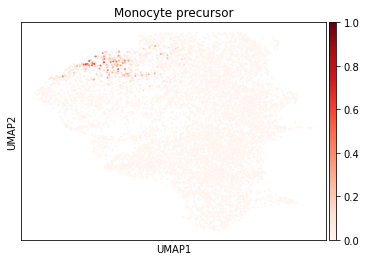

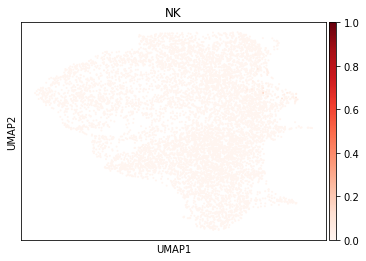

In [6]:
# Transfer annotations to UMAP and Plot
for x in scores.columns:
    if x in all_fl_cts:
        adata.obs[x] = scores[x]
        sc.pl.umap(adata, color=x, cmap='Reds',
                   vmin=0, vmax=1
                  #save='Fetal_liver_score+'+x+'.pdf'
                  )

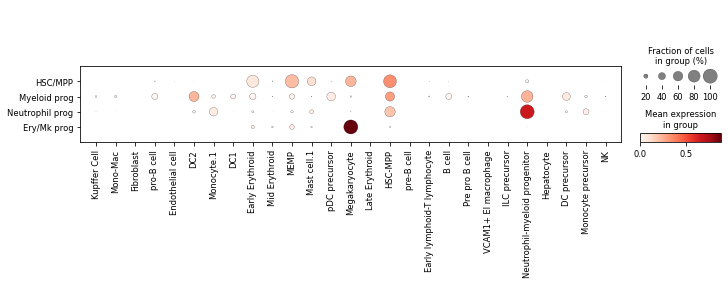

In [7]:
# Dot plot fetal liver ct scores over cell types
sc.pl.dotplot(adata, var_names=all_fl_cts, groupby='Cell Types',
             #save='Fetal_liver_ct_score_by_our_cts.pdf'
             )

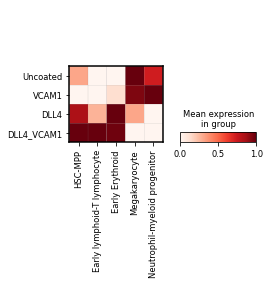

In [8]:
# FL scores by coating condition
sc.pl.matrixplot(adata, groupby='Sample', var_names=['HSC-MPP', 'Early lymphoid-T lymphocyte',
                                                    'Early Erythroid', 'Megakaryocyte',
                                                     'Neutrophil-myeloid progenitor'],
                cmap='Reds',
                standard_scale='var')

# Fetal Liver Dataset Differential Expression Signatures

In [9]:
fl = sc.read('../fl-data-ematb/fetal_liver_alladata_norm_10000.h5ad')

In [10]:
sc.tl.rank_genes_groups(fl, groupby='cell.labels', method='wilcoxon', reference='rest')

In [11]:
key_dict = {}
for x in list(set(fl.obs['cell.labels'])):
    key_dict[x] = list(sc.get.rank_genes_groups_df(fl, group=x)['names'])[0:49]
key_dict_df = pd.DataFrame.from_dict(key_dict, orient='index')
key_dict_df.to_csv('../fl-data-ematb/fl-cts-de-genes.csv')

In [12]:
de = pd.read_csv('../fl-data-ematb/fl-cts-de-genes.csv', index_col=0).transpose()

In [13]:
hsc_mpp_genes = list(de['HSC_MPP'])

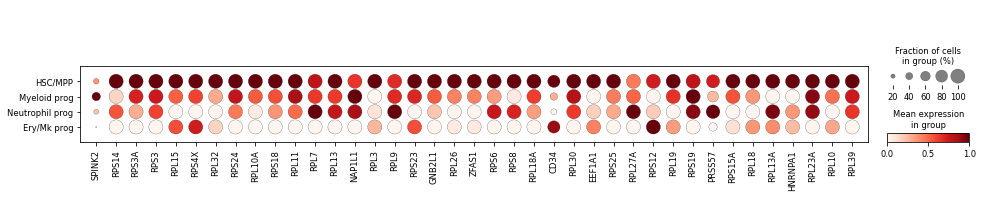

In [14]:
# FL HSC-MPP Genes over our cell types
sc.pl.dotplot(adata, groupby='Cell Types',
              var_names=[x for x in hsc_mpp_genes[0:40] if x in adata.var_names],
             standard_scale='var', 
              #save='164_celltypes_de_genes_40.pdf'
             )

In [15]:
# Assign to Fetal Liver Cell Types
adata.obs['FL Cell Type Assignment'] = scores.idxmax(axis=1)

In [16]:
# Define color palette
FL_colors = ['darkorange','bisque','darkred','magenta','plum',
             'steelblue','gray','lightcoral','navy','turquoise',
             'red','greenyellow','thistle','brown','seagreen','tan','linen']

... storing 'FL Cell Type Assignment' as categorical


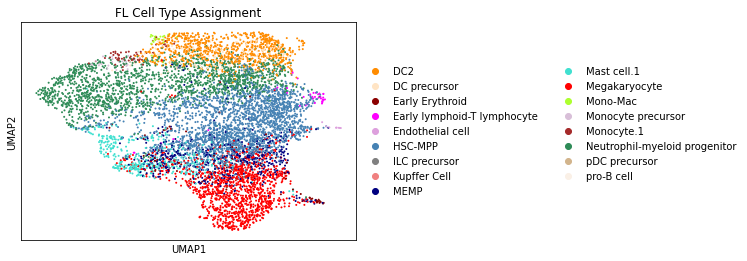

In [17]:
# FL Cell Type assignment UMAP
sc.pl.umap(adata, color='FL Cell Type Assignment', palette=FL_colors)

Fetal Liver Cell Census

In [18]:
samples = adata.obs.groupby(['Sample', 'FL Cell Type Assignment']).size().unstack()

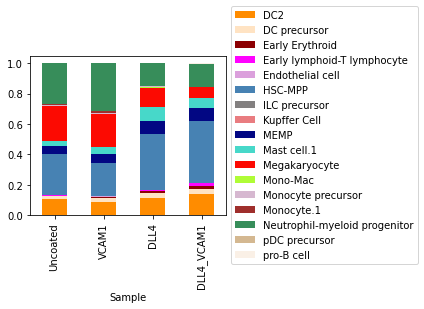

In [19]:
# Cell Census
cmap1 = LinearSegmentedColormap.from_list("my_colormap", FL_colors)
samples.div(samples.sum(axis=1), axis=0).plot(kind='bar', stacked=True,
                                              cmap=cmap1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
#plt.savefig('../review-figure-updates-pdfs/fl-celltype-assignment-cell-census.pdf')
plt.show()